In [48]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import SCM6
import paleoclim_leeds.hadcm3_processing as hcm3
import paleoclim_leeds.zones as zones
import cartopy.feature
import cartopy.crs as ccrs
import matplotlib.colors as colors

# Demo HadCM3

**Objective**: Present paleo_clim leeds package through the example of HadCM3

*prerequisite*: Please indicate experients name and paths on the ressources/hadcm3_input file beforehand

## Atmosphere dataset

There are two atmospheric datasets: ATMUPDS and ATMSURFDS. To access them (for xosfb experiment between years 3000 and 3100 for instance), simply do:

In [49]:
hcm3.ATMUPMDS('xosfb', 3000, 3010)

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMUPMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.


lon: [1.875; 5.625; ...; 354.375; 358.125; 96]; lon_p: [1.875; 5.625; ...; 358.125; 361.875; 97]
lonb: [0.0; 3.75; ...; 352.5; 356.25; 96]; lonb_p: [0.0; 3.75; ...; 356.25; 360.0; 97]
lons: [3.75; 3.75; ...; 3.75; 3.75; 95]; lons_p: [3.75; 3.75; ...; 3.75; 3.75; 96]
lat: [-88.75; -86.25; ...; 86.25; 88.75; 72]; lat_p: [-90.0; -88.75; ...; 88.75; 90.0; 74]
latb: [-90.0; -87.5; ...; 87.5; 90.0; 73]; latb_p: [-90.0; -87.5; ...; 87.5; 90.0; 73]
lats: [2.5; 2.5; ...; 2.5; 2.5; 72]; lats_p: [2.5; 2.5; ...; 2.5; 2.5; 72]
z: [10.0; 20.0; ...; 925.0; 1000.0; 17]; z_p: [10.0; 20.0; ...; 925.0; 1000.0; 17]
zb: [5.0; 15.0; ...; 962.5; 1037.5; 18]; zb_p: [5.0; 15.0; ...; 962.5; 1037.5; 18]
zs: [10.0; 10.0; ...; 75.0; 75.0; 16]; zs_p: [10.0; 5.0; ...; 75.0; 75.0; 17]
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12-01 00:00:00; 132]
DATA: <xarray.Dataset>
Dimensions:      (latitude: 72, latitude_1: 73, longitude: 96, longitude_1: 96, p: 17, t: 1)
Coordinates:
  * longi

In [50]:
hcm3.ATMSURFMDS('xosfb', 3000, 3010)

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMSURFMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.


lon: [0.0; 3.75; ...; 352.5; 356.25; 96]; lon_p: [0.0; 3.75; ...; 356.25; 360.0; 97]
lonb: [1.875; 5.625; ...; 354.375; 358.125; 96]; lonb_p: [1.875; 5.625; ...; 358.125; 361.875; 97]
lons: [3.75; 3.75; ...; 3.75; 3.75; 95]; lons_p: [3.75; 3.75; ...; 3.75; 3.75; 96]
lat: [-90.0; -87.5; ...; 87.5; 90.0; 73]; lat_p: [-90.0; -87.5; ...; 87.5; 90.0; 73]
latb: [-88.75; -86.25; ...; 86.25; 88.75; 72]; latb_p: [-90.0; -88.75; ...; 88.75; 91.25; 74]
lats: [2.5; 2.5; ...; 2.5; 2.5; 71]; lats_p: [1.25; 2.5; ...; 2.5; 2.5; 73]
z: None; z_p: None
zb: None; zb_p: None
zs: None; zs_p: None
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12-01 00:00:00; 132]
DATA: <xarray.Dataset>
Dimensions:                   (ht: 1, hybrid_p_x1000: 1, hybrid_p_x1000_1: 1, latitude: 73, latitude_1: 72, level275: 1, level6: 4, longitude: 96, longitude_1: 96, msl: 1, surface: 1, t: 1, toa: 1, unspecified: 1)
Coordinates:
  * longitude                 (longitude) float32 0.0 3.75 7.5 ... 35

Coordinates can simply be accessed as attributes of the GeoDS object:

In [51]:
hcm3.ATMUPMDS('xosfb', 3000, 3010).lon

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMUPMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.


array([  1.875,   5.625,   9.375,  13.125,  16.875,  20.625,  24.375,
        28.125,  31.875,  35.625,  39.375,  43.125,  46.875,  50.625,
        54.375,  58.125,  61.875,  65.625,  69.375,  73.125,  76.875,
        80.625,  84.375,  88.125,  91.875,  95.625,  99.375, 103.125,
       106.875, 110.625, 114.375, 118.125, 121.875, 125.625, 129.375,
       133.125, 136.875, 140.625, 144.375, 148.125, 151.875, 155.625,
       159.375, 163.125, 166.875, 170.625, 174.375, 178.125, 181.875,
       185.625, 189.375, 193.125, 196.875, 200.625, 204.375, 208.125,
       211.875, 215.625, 219.375, 223.125, 226.875, 230.625, 234.375,
       238.125, 241.875, 245.625, 249.375, 253.125, 256.875, 260.625,
       264.375, 268.125, 271.875, 275.625, 279.375, 283.125, 286.875,
       290.625, 294.375, 298.125, 301.875, 305.625, 309.375, 313.125,
       316.875, 320.625, 324.375, 328.125, 331.875, 335.625, 339.375,
       343.125, 346.875, 350.625, 354.375, 358.125], dtype=float32)

Description of different coordinates

And variables by doing (function to print all the aviable variables):

In [52]:
hcm3.ATMSURFMDS('xosfb', 3000, 3010).sat()

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMSURFMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SAT.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.


lon: [0.0; 3.75; ...; 352.5; 356.25; 96]; lon_p: [0.0; 3.75; ...; 356.25; 360.0; 97]
lonb: [1.875; 5.625; ...; 354.375; 358.125; 96]; lonb_p: [1.875; 5.625; ...; 358.125; 361.875; 97]
lons: [3.75; 3.75; ...; 3.75; 3.75; 95]; lons_p: [3.75; 3.75; ...; 3.75; 3.75; 96]
lat: [-90.0; -87.5; ...; 87.5; 90.0; 73]; lat_p: [-90.0; -87.5; ...; 87.5; 90.0; 73]
latb: [-88.75; -86.25; ...; 86.25; 88.75; 72]; latb_p: [-90.0; -88.75; ...; 88.75; 91.25; 74]
lats: [2.5; 2.5; ...; 2.5; 2.5; 71]; lats_p: [1.25; 2.5; ...; 2.5; 2.5; 73]
z: None; z_p: None
zb: None; zb_p: None
zs: None; zs_p: None
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12-01 00:00:00; 132]
DATA: <xarray.DataArray 'temp_mm_srf' (t: 132, latitude: 73, longitude: 96)>
array([[[240.05002, 240.05002, 240.05002, ..., 240.05002, 240.05002,
         240.05002],
        [240.55005, 240.38693, 240.13115, ..., 239.54504, 240.04381,
         240.4303 ],
        [241.01343, 240.64845, 240.09785, ..., 240.96417, 241.

### GeoDatarray

Diffrent processing of the data along coordinates are available: mean, value, index, sum, median (to come: weighted mean, weighted sum). For example, to have the mean sat of xosfb between years 3000 and 3100

In [53]:
sat = hcm3.ATMSURFMDS('xosfb', 3000, 3010).sat(mode_t='mean')
sat

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMSURFMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SAT.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.


lon: [0.0; 3.75; ...; 352.5; 356.25; 96]; lon_p: [0.0; 3.75; ...; 356.25; 360.0; 97]
lonb: [1.875; 5.625; ...; 354.375; 358.125; 96]; lonb_p: [1.875; 5.625; ...; 358.125; 361.875; 97]
lons: [3.75; 3.75; ...; 3.75; 3.75; 95]; lons_p: [3.75; 3.75; ...; 3.75; 3.75; 96]
lat: [-90.0; -87.5; ...; 87.5; 90.0; 73]; lat_p: [-90.0; -87.5; ...; 87.5; 90.0; 73]
latb: [-88.75; -86.25; ...; 86.25; 88.75; 72]; latb_p: [-90.0; -88.75; ...; 88.75; 91.25; 74]
lats: [2.5; 2.5; ...; 2.5; 2.5; 71]; lats_p: [1.25; 2.5; ...; 2.5; 2.5; 73]
z: None; z_p: None
zb: None; zb_p: None
zs: None; zs_p: None
t: None
DATA: <xarray.DataArray 'temp_mm_srf' (latitude: 73, longitude: 96)>
array([[218.65587, 218.65587, 218.65587, ..., 218.65587, 218.65587,
        218.65587],
       [216.67722, 216.63687, 216.95862, ..., 216.8488 , 216.95241,
        216.70607],
       [218.15073, 218.28296, 218.00694, ..., 219.23091, 218.59045,
        218.08911],
       ...,
       [232.0586 , 232.32587, 232.49037, ..., 232.75354, 232.063

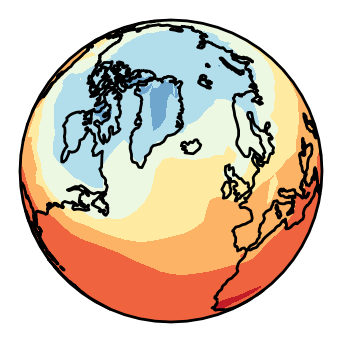

In [54]:
projection = ccrs.NearsidePerspective(central_longitude=-30, central_latitude=60, satellite_height=7000000 )

figMap = plt.figure(figsize=(2,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1, projection=projection)

cm = axMap.contourf(sat.lon_p, sat.lat_p, sat.values(), transform=ccrs.PlateCarree(), cmap="RdYlBu_r")
axMap.coastlines()
axMap.set_global()

*rq*: In the previous example I used the processed values which provide the optimal display. If you want to use the unprocessed values, please do:

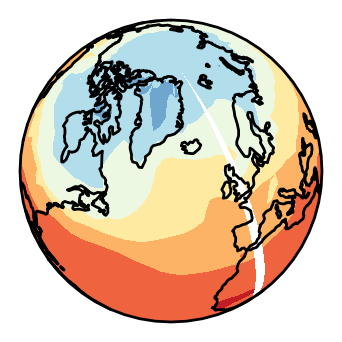

In [55]:
projection = ccrs.NearsidePerspective(central_longitude=-30, central_latitude=60, satellite_height=7000000 )

figMap = plt.figure(figsize=(2,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1, projection=projection)

cm = axMap.contourf(sat.lon, sat.lat, sat.values(processing=False), transform=ccrs.PlateCarree(), cmap="RdYlBu_r")
axMap.coastlines()
axMap.set_global()

Another example to print the temperature profile at longitude 300

In [56]:
temperature = hcm3.ATMUPMDS('xosfb', 3000, 3010).temperature(mode_t='mean', mode_lon='value', value_lon=300)
temperature

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMUPMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing atmosphere temperaure.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ New longitude value : 300.0


lon: [300.0; 1]; lon_p: [300.0; 1]
lonb: [300.0; 1]; lonb_p: [300.0; 1]
lons: None; lons_p: None
lat: [-88.75; -86.25; ...; 86.25; 88.75; 72]; lat_p: [-90.0; -88.75; ...; 88.75; 90.0; 74]
latb: [-90.0; -87.5; ...; 87.5; 90.0; 73]; latb_p: [-90.0; -87.5; ...; 87.5; 90.0; 73]
lats: [2.5; 2.5; ...; 2.5; 2.5; 72]; lats_p: [2.5; 2.5; ...; 2.5; 2.5; 72]
z: [10.0; 20.0; ...; 925.0; 1000.0; 17]; z_p: [10.0; 20.0; ...; 925.0; 1000.0; 17]
zb: [5.0; 15.0; ...; 962.5; 1037.5; 18]; zb_p: [5.0; 15.0; ...; 962.5; 1037.5; 18]
zs: [10.0; 10.0; ...; 75.0; 75.0; 16]; zs_p: [10.0; 5.0; ...; 75.0; 75.0; 17]
t: None
DATA: <xarray.DataArray 'temp_mm_p' (z: 17, latitudeb: 73)>
array([[221.3392 , 221.53818, 222.46704, ..., 229.465  , 229.07938,
        228.72887],
       [212.6319 , 212.94257, 213.6646 , ..., 222.68701, 222.41925,
        222.08083],
       [210.75081, 211.05174, 211.22227, ..., 220.90573, 220.86415,
        220.64938],
       ...,
       [233.24146, 241.92505, 241.32768, ..., 242.55142, 242.2

Text(0, 0.5, 'Altitude (m)')

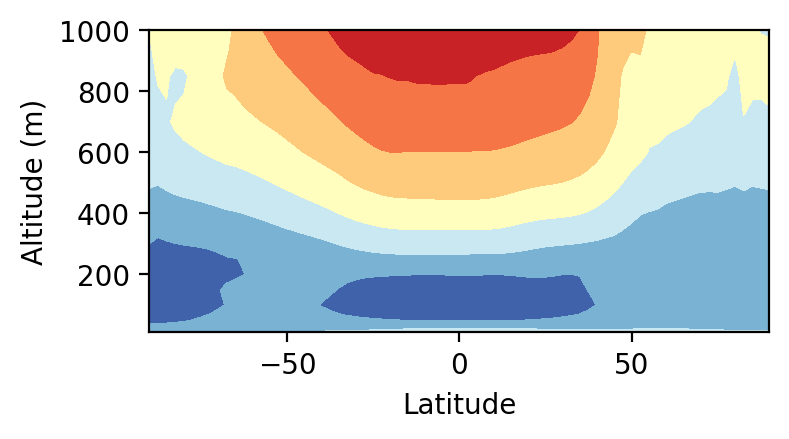

In [57]:
figMap = plt.figure(figsize=(4,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1)

cm = axMap.contourf(temperature.latb_p, temperature.z_p, temperature.values(), cmap="RdYlBu_r")
axMap.set_xlabel('Latitude')
axMap.set_ylabel('Altitude (m)')

## Ocean dataset

In [58]:
hcm3.OCNYDS('xosfb', 3000, 3010)

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNYDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.


lon: [0.0; 1.25; ...; 357.5; 358.75; 288]; lon_p: [0.0; 1.25; ...; 358.75; 360.0; 289]
lonb: [0.625; 1.875; ...; 358.125; 359.375; 288]; lonb_p: [0.625; 1.875; ...; 359.375; 360.625; 289]
lons: [1.25; 1.25; ...; 1.25; 1.25; 287]; lons_p: [1.25; 1.25; ...; 1.25; 1.25; 288]
lat: [-89.375; -88.125; ...; 88.125; 89.375; 144]; lat_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
latb: [-88.75; -87.5; ...; 87.5; 88.75; 143]; latb_p: [-90.0; -88.75; ...; 88.75; 90.0; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 142]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-10.0; -20.0; ...; -4269.5; -4884.7998046875; 19]; z_p: [-10.0; -20.0; ...; -4269.5; -4884.7998046875; 19]
zb: [-5.0; -15.0; ...; -4577.14990234375; -5192.4501953125; 20]; zb_p: [-5.0; -15.0; ...; -4577.14990234375; -5192.4501953125; 20]
zs: [-10.0; -10.0; ...; -615.25; -615.30029296875; 19]; zs_p: [-10.0; -10.0; ...; -615.25; -615.30029296875; 19]
t: [3000-06-01 00:00:00; 3001-06-01 00:00:00; ...; 3009-06-01 00:00:00; 3010-06-01 00:00:00

In [59]:
hcm3.OCNMDS('xosfb', 3000, 3010)

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.


lon: [0.0; 1.25; ...; 357.5; 358.75; 288]; lon_p: [0.0; 1.25; ...; 358.75; 360.0; 289]
lonb: [0.625; 1.875; ...; 358.125; 359.375; 288]; lonb_p: [0.625; 1.875; ...; 359.375; 360.625; 289]
lons: [1.25; 1.25; ...; 1.25; 1.25; 287]; lons_p: [1.25; 1.25; ...; 1.25; 1.25; 288]
lat: [-89.375; -88.125; ...; 88.125; 89.375; 144]; lat_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
latb: [-88.75; -87.5; ...; 87.5; 88.75; 143]; latb_p: [-90.0; -88.75; ...; 88.75; 90.0; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 142]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-10.0; -20.0; ...; -242.60000610351562; -359.3999938964844; 10]; z_p: [-10.0; -20.0; ...; -242.60000610351562; -359.3999938964844; 10]
zb: [-5.0; -15.0; ...; -203.6999969482422; -301.0; 10]; zb_p: [-5.0; -15.0; ...; -301.0; -417.79998779296875; 11]
zs: [-10.0; -10.0; ...; -64.80000305175781; -97.30000305175781; 9]; zs_p: [-10.0; -10.0; ...; -97.30000305175781; -116.79998779296875; 10]
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 301

In [13]:
sst = hcm3.OCNMDS('xosfb', 3000, 3010, month_list=['ja','fb','dc']).sst(mode_t='mean')
sst

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SST.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


lon: [0.0; 1.25; ...; 357.5; 358.75; 288]; lon_p: [0.0; 1.25; ...; 358.75; 360.0; 289]
lonb: [0.625; 1.875; ...; 358.125; 359.375; 288]; lonb_p: [0.625; 1.875; ...; 359.375; 360.625; 289]
lons: [1.25; 1.25; ...; 1.25; 1.25; 287]; lons_p: [1.25; 1.25; ...; 1.25; 1.25; 288]
lat: [-89.375; -88.125; ...; 88.125; 89.375; 144]; lat_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
latb: [-88.75; -87.5; ...; 87.5; 88.75; 143]; latb_p: [-90.0; -88.75; ...; 88.75; 90.0; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 142]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-359.3999938964844; -242.60000610351562; ...; -20.0; -10.0; 10]; z_p: [-359.3999938964844; -242.60000610351562; ...; -20.0; -10.0; 10]
zb: [-301.0; -203.6999969482422; ...; -15.0; -5.0; 10]; zb_p: [-417.79998779296875; -301.0; ...; -15.0; -5.0; 11]
zs: [-97.30000305175781; -64.80000305175781; ...; -10.0; -10.0; 9]; zs_p: [-116.79998779296875; -97.30000305175781; ...; -10.0; -10.0; 10]
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 301

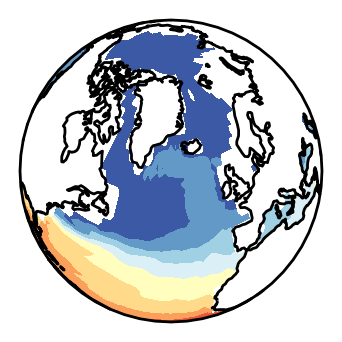

In [14]:
projection = ccrs.NearsidePerspective(central_longitude=-30, central_latitude=60, satellite_height=7000000 )

figMap = plt.figure(figsize=(2,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1, projection=projection)

cm = axMap.contourf(sst.lon_p, sst.lat_p, sst.values(), transform=ccrs.PlateCarree(), cmap="RdYlBu_r")
axMap.coastlines()
axMap.set_global()

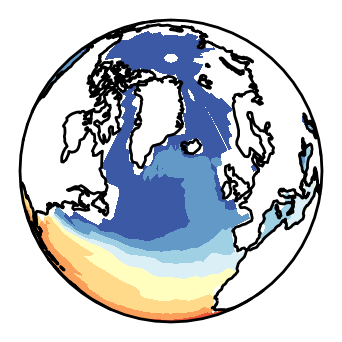

In [15]:
projection = ccrs.NearsidePerspective(central_longitude=-30, central_latitude=60, satellite_height=7000000 )

figMap = plt.figure(figsize=(2,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1, projection=projection)

cm = axMap.contourf(sst.lon, sst.lat, sst.values(processing=False), transform=ccrs.PlateCarree(), cmap="RdYlBu_r")
axMap.coastlines()
axMap.set_global()

In [16]:
temperature = hcm3.OCNYDS('xosfb', 3000, 3010).temperature(mode_t='mean', mode_lon='value', value_lon=350)
temperature

__ Importing <class 'paleoclim_leeds.hadcm3_processing.OCNYDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing temperature.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ New longitude value : 350.0


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


lon: [349.375; 1]; lon_p: [349.375; 1]
lonb: [349.375; 1]; lonb_p: [349.375; 1]
lons: None; lons_p: None
lat: [-89.375; -88.125; ...; 88.125; 89.375; 144]; lat_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
latb: [-88.75; -87.5; ...; 87.5; 88.75; 143]; latb_p: [-90.0; -88.75; ...; 88.75; 90.0; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 142]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-4884.7998046875; -4269.5; ...; -20.0; -10.0; 19]; z_p: [-4884.7998046875; -4269.5; ...; -20.0; -10.0; 19]
zb: [-5192.4501953125; -4577.14990234375; ...; -15.0; -5.0; 20]; zb_p: [-5192.4501953125; -4577.14990234375; ...; -15.0; -5.0; 20]
zs: [-615.30029296875; -615.2999267578125; ...; -10.0; -10.0; 19]; zs_p: [-615.30029296875; -615.2999267578125; ...; -10.0; -10.0; 19]
t: [3000-06-01 00:00:00; 3001-06-01 00:00:00; ...; 3009-06-01 00:00:00; 3010-06-01 00:00:00; 11]
DATA: <xarray.DataArray 'temp_ym_dpth' (zb: 20, latitude: 144)>
array([[        nan,         nan,         nan, ...,         nan,
           

Text(0, 0.5, 'depth (m)')

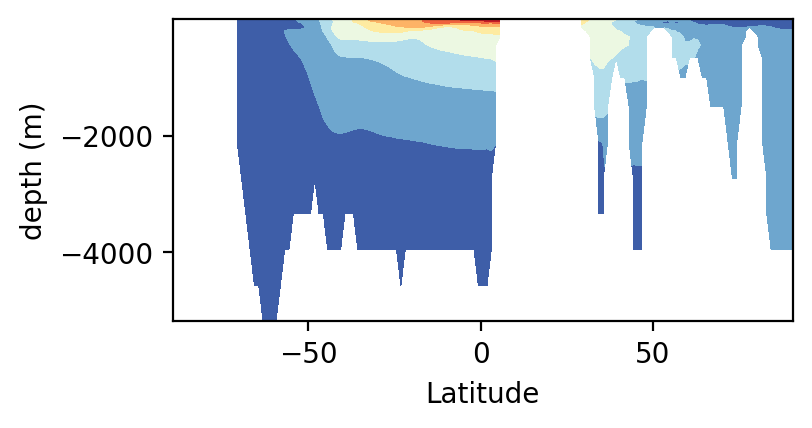

In [17]:
figMap = plt.figure(figsize=(4,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1)

cm = axMap.contourf(temperature.lat_p, temperature.zb_p, temperature.values(), cmap="RdYlBu_r")
axMap.set_xlabel('Latitude')
axMap.set_ylabel('depth (m)')

## Zone

In [18]:
zone_na = zones.Box(lon_min=310, lon_max=340, lat_min=50, lat_max=70)
sat = hcm3.ATMSURFMDS('xosfb', 3000, 3010).sat(mode_t='mean', zone=zone_na)
sat

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMSURFMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SAT.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


lon: [311.25; 315.0; ...; 333.75; 337.5; 8]; lon_p: [311.25; 315.0; ...; 333.75; 337.5; 8]
lonb: [313.125; 316.875; ...; 335.625; 339.375; 8]; lonb_p: [313.125; 316.875; ...; 335.625; 339.375; 8]
lons: [3.75; 3.75; ...; 3.75; 3.75; 12]; lons_p: [3.75; 3.75; ...; 3.75; 3.75; 12]
lat: [50.0; 52.5; ...; 67.5; 70.0; 9]; lat_p: [50.0; 52.5; ...; 67.5; 70.0; 9]
latb: [51.25; 53.75; ...; 66.25; 68.75; 8]; latb_p: [48.75; 51.25; ...; 63.75; 66.25; 8]
lats: [2.5; 2.5; ...; 2.5; 2.5; 15]; lats_p: [2.5; 2.5; ...; 2.5; 2.5; 15]
z: None; z_p: None
zb: None; zb_p: None
zs: None; zs_p: None
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12-01 00:00:00; 132]
DATA: <xarray.DataArray 'temp_mm_srf' (latitude: 9, longitude: 8)>
array([[249.81143, 252.88933, 255.80878, 257.9481 , 260.06473, 262.3618 ,
        264.32178, 266.31885],
       [247.96062, 251.20653, 254.10825, 256.34357, 258.5687 , 260.8615 ,
        262.7806 , 265.0222 ],
       [247.62212, 250.80063, 253.02885, 2

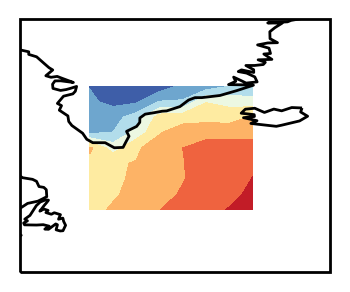

In [19]:
projection = ccrs.PlateCarree()

figMap = plt.figure(figsize=(2,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1, projection=projection)

cm = axMap.contourf(sat.lon_p, sat.lat_p, sat.values(), transform=ccrs.PlateCarree(), cmap="RdYlBu_r")
axMap.coastlines()
axMap.set_extent([300, 350, 40, 80])

And now with longitudeb and latitudeb?

In [22]:
hcm3.ATMSURFMDS('xosfb', 3000, 3010)

__ Importing <class 'paleoclim_leeds.hadcm3_processing.ATMSURFMDS'>
____ Paths generated for xosfb between years 3000 and 3010.
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.


lon: [0.0; 3.75; ...; 352.5; 356.25; 96]; lon_p: [0.0; 3.75; ...; 356.25; 360.0; 97]
lonb: [1.875; 5.625; ...; 354.375; 358.125; 96]; lonb_p: [1.875; 5.625; ...; 358.125; 361.875; 97]
lons: [3.75; 3.75; ...; 3.75; 3.75; 95]; lons_p: [3.75; 3.75; ...; 3.75; 3.75; 96]
lat: [-90.0; -87.5; ...; 87.5; 90.0; 73]; lat_p: [-90.0; -87.5; ...; 87.5; 90.0; 73]
latb: [-88.75; -86.25; ...; 86.25; 88.75; 72]; latb_p: [-90.0; -88.75; ...; 88.75; 91.25; 74]
lats: [2.5; 2.5; ...; 2.5; 2.5; 71]; lats_p: [1.25; 2.5; ...; 2.5; 2.5; 73]
z: None; z_p: None
zb: None; zb_p: None
zs: None; zs_p: None
t: [3000-01-01 00:00:00; 3000-02-01 00:00:00; ...; 3010-11-01 00:00:00; 3010-12-01 00:00:00; 132]
DATA: <xarray.Dataset>
Dimensions:                   (ht: 1, hybrid_p_x1000: 1, hybrid_p_x1000_1: 1, latitude: 73, latitude_1: 72, level275: 1, level6: 4, longitude: 96, longitude_1: 96, msl: 1, surface: 1, t: 1, toa: 1, unspecified: 1)
Coordinates:
  * longitude                 (longitude) float32 0.0 3.75 7.5 ... 35

## Time Series

__ Importation of <class 'paleoclim_leeds.hadcm3_processing.SATMTS'> : xosfa between years 3000 and 3010.
Time elapsed for open_dataset : 0.23783230781555176
Time elapsed for crop start year : 2.914152145385742
Time elapsed for crop start and end years : 3.3240063190460205
Time elapsed for crop start and end years and months : 3.463059425354004
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SAT.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.


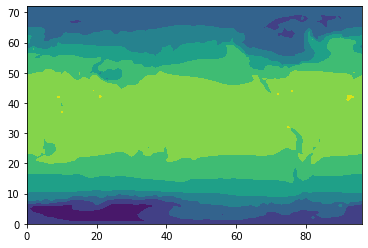

In [22]:
plt.contourf(hcm3.SATMTS('xosfa', 3000, 3010).sat(mode_t='mean').values())

In [4]:
ts = hcm3.MERIDATS('xosfb', 3000, 3010)
ts

__ Importation of <class 'paleoclim_leeds.hadcm3_processing.MERIDATS'> : xosfb between years 3000 and 3010.
Time elapsed for open_dataset : 0.030374765396118164
Time elapsed for crop start year : 0.5210518836975098
Time elapsed for crop start and end years : 0.5966029167175293
Time elapsed for crop start and end years and months : 0.5966858863830566
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.


lon: None; lon_p: None
lonb: None; lonb_p: None
lons: None; lons_p: None
lat: [-88.75; -87.5; ...; 87.5; 88.75; 143]; lat_p: [-88.75; -87.5; ...; 88.75; 90.0; 144]
latb: [-89.375; -88.125; ...; 88.125; 89.375; 144]; latb_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 143]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-0.0; -10.0; ...; -4884.7998046875; -5500.099609375; 21]; z_p: [-0.0; -10.0; ...; -4884.7998046875; -5500.099609375; 21]
zb: [5.0; -5.0; ...; -5192.44970703125; -5807.74951171875; 22]; zb_p: [5.0; -5.0; ...; -5192.44970703125; -5807.74951171875; 22]
zs: [-10.0; -10.0; ...; -615.2998046875; -615.2998046875; 21]; zs_p: [-10.0; -10.0; ...; -615.2998046875; -615.2998046875; 21]
t: [3000-06-01 00:00:00; 3001-06-01 00:00:00; ...; 3009-06-01 00:00:00; 3010-06-01 00:00:00; 11]
DATA: <xarray.Dataset>
Dimensions:         (depth: 21, latitude: 143, t: 11)
Coordinates:
  * depth           (depth) float32 -0.0 -10.0 -20.0 ... -4884.8 -5500.0996
  

In [30]:
amoc = hcm3.MERIDATS('xosfa', 3000, 3010).atlantic(zone=zones.Box(lat_min=-10), mode_t='mean')
amoc

__ Importation of <class 'paleoclim_leeds.hadcm3_processing.MERIDATS'> : xosfa between years 3000 and 3010.
Time elapsed for open_dataset : 0.028006792068481445
Time elapsed for crop start year : 0.4137277603149414
Time elapsed for crop start and end years : 0.4677720069885254
Time elapsed for crop start and end years and months : 0.46783995628356934
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing meridional Overturning Stream Function (Atlantic).
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.


lon: None; lon_p: None
lonb: None; lonb_p: None
lons: None; lons_p: None
lat: [-10.0; -8.75; ...; 87.5; 88.75; 80]; lat_p: [-10.0; -8.75; ...; 87.5; 88.75; 80]
latb: [-9.375; -8.125; ...; 88.125; 89.375; 80]; latb_p: [-9.375; -8.125; ...; 88.125; 89.375; 80]
lats: [1.25; 1.25; ...; 1.25; 1.25; 143]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-0.0; -10.0; ...; -4884.7998046875; -5500.099609375; 21]; z_p: [-0.0; -10.0; ...; -4884.7998046875; -5500.099609375; 21]
zb: [5.0; -5.0; ...; -5192.44970703125; -5807.74951171875; 22]; zb_p: [5.0; -5.0; ...; -5192.44970703125; -5807.74951171875; 22]
zs: [-10.0; -10.0; ...; -615.2998046875; -615.2998046875; 21]; zs_p: [-10.0; -10.0; ...; -615.2998046875; -615.2998046875; 21]
t: None
DATA: <xarray.DataArray 'Merid_Atlantic' (z: 21, latitude: 80)>
array([[-1.1920929e-06, -1.4471060e-06, -1.3834374e-06, ...,
                   nan,            nan,            nan],
       [ 1.7637421e+00,  3.4569591e-01,  8.3511829e-01, ...,
                   nan, 

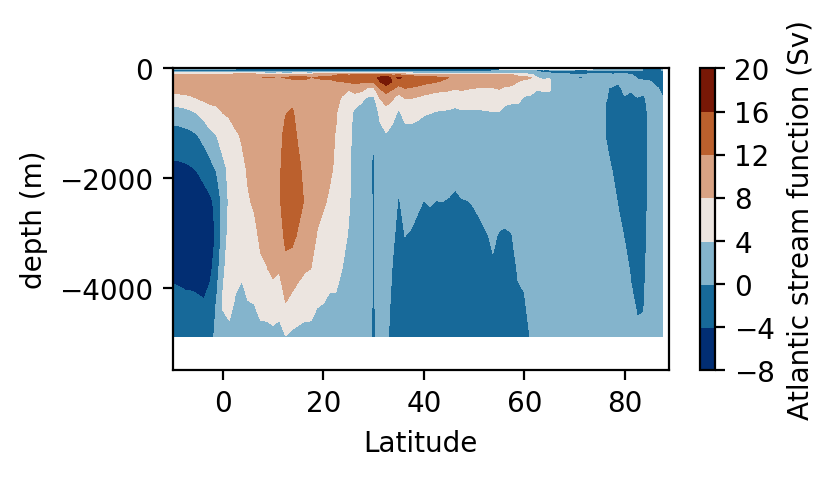

In [60]:
figMap = plt.figure(figsize=(4,2), dpi = 200)
axMap = figMap.add_subplot(1, 1, 1)

cm = axMap.contourf(amoc.lat_p,  amoc.z_p, amoc.values(), cmap=SCM6.vik)
axMap.set_xlabel('Latitude')
axMap.set_ylabel('depth (m)')
figMap.colorbar(mappable=cm, ax=axMap, label="Atlantic stream function (Sv)")

In [40]:
start_xosfb, end_xosfb = 5300, 5950
start_st_xosfb, end_st_xosfb = 5800, 5900
start_it_xosfb, end_it_xosfb = 5350, 5450
start_xosfc, end_xosfc = 2900, 3600
start_st_xosfc, end_st_xosfc = 2950, 3050
start_it_xosfc, end_it_xosfc = 3450, 3550
start_xosfd, end_xosfd = 2900, 3400
start_st_xosfd, end_st_xosfd = 2950, 3050
start_it_xosfd, end_it_xosfd = 3250, 3350
start_tfgbe, end_tfgbe = 250, 800
start_st_tfgbe, end_st_tfgbe = 300, 400
start_it_tfgbe, end_it_tfgbe = 650, 750

In [41]:
# XOSFB

ts = hcm3.MERIDATS("xosfb", start_xosfb, end_xosfb)
moc_st_xosfb = ts.atlantic(zone=zones.Box(lat_min=-10), mode_t="mean", new_start_year=start_st_xosfb, new_end_year=end_st_xosfb)
moc_it_xosfb = ts.atlantic(zone=zones.Box(lat_min=-10), mode_t="mean", new_start_year=start_it_xosfb, new_end_year=end_it_xosfb)

# TFGBE

ts = hcm3.MERIDATS("tfgbe", start_tfgbe, end_tfgbe)
moc_st_tfgbe = ts.atlantic(zone=zones.Box(lat_min=-10), mode_t="mean", new_start_year=start_st_tfgbe, new_end_year=end_st_tfgbe)
moc_it_tfgbe = ts.atlantic(zone=zones.Box(lat_min=-10), mode_t="mean", new_start_year=start_it_tfgbe, new_end_year=end_it_tfgbe)

# XOSFC

ts = hcm3.MERIDATS("xosfc", start_xosfc, end_xosfc)
moc_st_xosfc = ts.atlantic(zone=zones.Box(lat_min=-10), mode_t="mean", new_start_year=start_st_xosfc, new_end_year=end_st_xosfc)
moc_it_xosfc = ts.atlantic(zone=zones.Box(lat_min=-10), mode_t="mean", new_start_year=start_it_xosfc, new_end_year=end_it_xosfc)

# XOSFD

ts = hcm3.MERIDATS("xosfd", start_xosfd, end_xosfd)
moc_st_xosfd = ts.atlantic(zone=zones.Box(lat_min=-10), mode_t="mean", new_start_year=start_st_xosfd, new_end_year=end_st_xosfd)
moc_it_xosfd = ts.atlantic(zone=zones.Box(lat_min=-10), mode_t="mean", new_start_year=start_it_xosfd, new_end_year=end_it_xosfd)

lat_moc, z_moc = moc_st_xosfb.lat, moc_st_xosfb.z

__ Importation of <class 'paleoclim_leeds.hadcm3_processing.MERIDATS'> : xosfb between years 5300 and 5950.
Time elapsed for open_dataset : 0.04595637321472168
Time elapsed for crop start year : 0.3732109069824219
Time elapsed for crop start and end years : 0.4165475368499756
Time elapsed for crop start and end years and months : 0.41662120819091797
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing meridional Overturning Stream Function (Atlantic).
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.
____ Data cropped to the new start and end years.
__ Importing meridional Overturning Stream Function (Atlantic).
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
____ Data compacted to the zone.
____ Data cropped to the new start and end years.
__ Importation of <class 'paleoclim_leeds.hadcm3_processing.MERIDATS'> :

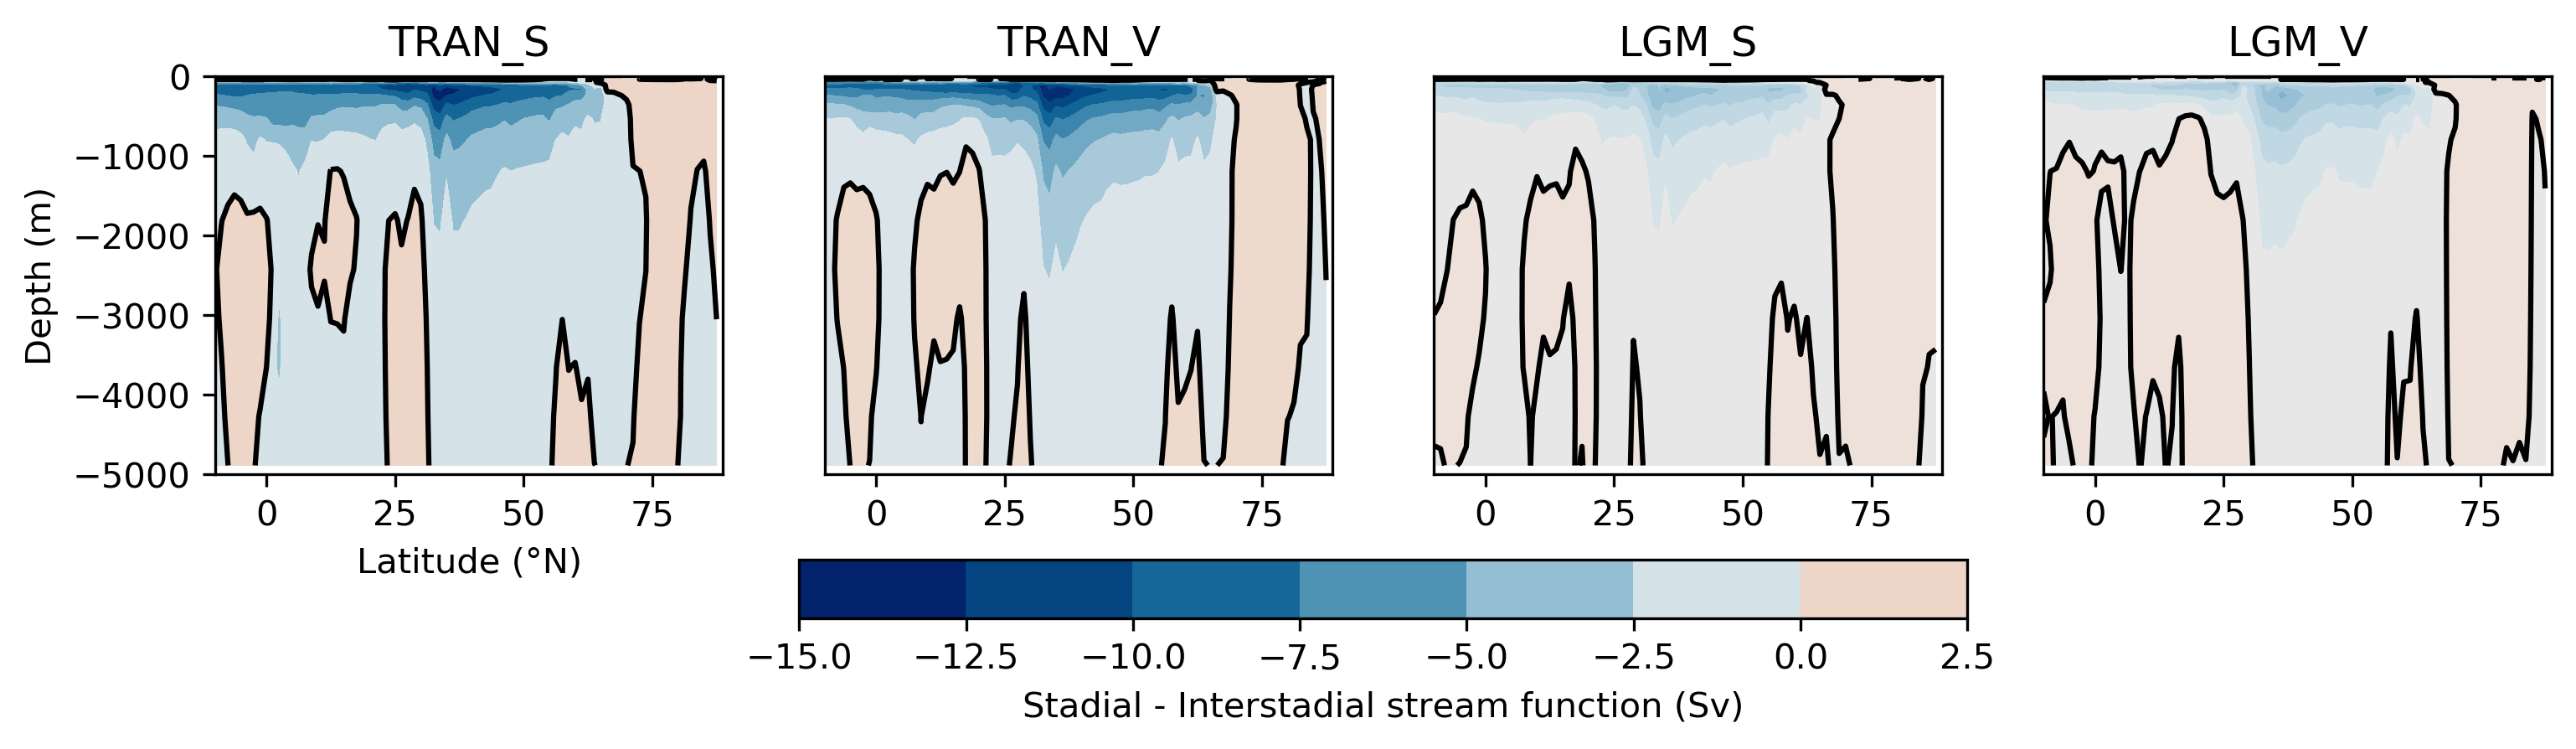

In [44]:
figMap, (axB, axE, axC, axD) = plt.subplots(nrows=1, ncols=4, figsize=(12, 3), dpi=300)

norm_moc = colors.DivergingNorm(vmin=-15, vcenter=0, vmax=15)

# XOSFB

values = moc_st_xosfb.values(processing=False) - moc_it_xosfb.values(processing=False)
cmB = axB.contourf(lat_moc, z_moc, values, cmap=SCM6.vik, norm=norm_moc)
axB.contour(lat_moc, z_moc, values, levels=[0], colors='black')
axB.set_xlabel("Latitude (°N)")
axB.set_ylim([-5000,0])
axB.set_ylabel("Depth (m)")
axB.set_title(f"TRAN_S")

# TFGBE

values = moc_st_tfgbe.values(processing=False) - moc_it_tfgbe.values(processing=False)
cmE = axE.contourf(lat_moc, z_moc, values, cmap=SCM6.vik, norm=norm_moc)
axE.contour(lat_moc, z_moc, values, levels=[0], colors='black')
axE.set_ylim([-5000,0])
axE.yaxis.set_visible(False)
axE.set_title(f"TRAN_V")

# XOSFC

values = moc_st_xosfc.values(processing=False) - moc_it_xosfc.values(processing=False)
cmC = axC.contourf(lat_moc, z_moc, values, cmap=SCM6.vik, norm=norm_moc)
axC.contour(lat_moc, z_moc, values, levels=[0], colors='black')
axC.set_ylim([-5000,0])
axC.yaxis.set_visible(False)
axC.set_title(f"LGM_S")

# XOSFD

values = moc_st_xosfd.values(processing=False) - moc_it_xosfd.values(processing=False)
cmD = axD.contourf(lat_moc, z_moc, values, cmap=SCM6.vik, norm=norm_moc)
axD.contour(lat_moc, z_moc, values, levels=[0], colors='black')
axD.set_ylim([-5000,0])
axD.yaxis.set_visible(False)
axD.set_title(f"LGM_V")

figMap.colorbar(mappable=cmB, ax=[axB, axE, axC, axD], label="Stadial - Interstadial stream function (Sv)", orientation="horizontal", shrink=0.5)

In [46]:
start_year = 5500
end_year = 6000

ts = hcm3.SATMTS("xosfa", start_year, end_year)
sat = ts.sat(mode_t="mean")
lon_at = sat.lon_p
lat_at = sat.lat_p

ts = hcm3.MLDMTS("xosfa", start_year, end_year)
mld = ts.mld(mode_t="mean")
lon_ocn = mld.lon_p
lat_ocn = mld.lat_p

ts = hcm3.ICECONCMTS("xosfa", start_year, end_year)
winter_ice = ts.ice_conc(mode_t="mean", new_month_list=["ja", "fb", "mr"])
summer_ice = ts.ice_conc(mode_t="mean", new_month_list=["jn", "jl", "ag"])
lon_ice = winter_ice.lon_p
lat_ice = winter_ice.lat_p

ts = hcm3.MERIDATS("xosfa", start_year, end_year)
amoc = ts.atlantic(zone=zones.Box(lat_min=-10), mode_t="mean")
lat_moc = amoc.lat_p
z_moc = amoc.z_p

__ Importation of <class 'paleoclim_leeds.hadcm3_processing.SATMTS'> : xosfa between years 5500 and 6000.
Time elapsed for open_dataset : 0.23995566368103027
Time elapsed for crop start year : 5.552716016769409
Time elapsed for crop start and end years : 5.753849506378174
Time elapsed for crop start and end years and months : 12.081960439682007
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing SAT.
____ Data imported in the GeoDataArray instance.
____ Coordinate imported in the GeoDataArray instance.
__ Importation of <class 'paleoclim_leeds.hadcm3_processing.MLDMTS'> : xosfa between years 5500 and 6000.
Time elapsed for open_dataset : 198.777676820755
Time elapsed for crop start year : 1313.0007073879242
Time elapsed for crop start and end years : 1314.1052737236023
Time elapsed for crop start and end years and months : 1323.941157579422
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.
__ Importing MLD.
____ Data imported i

In [ ]:
projection_map = ccrs.NearsidePerspective(central_longitude=-30, central_latitude=60, satellite_height=7000000 )

figMap = plt.figure(figsize=(12, 3), dpi=300)  # Sea ice and MLD
axAMOC = figMap.add_subplot(1, 3, 1)
axSAT = figMap.add_subplot(1, 3, 2, projection=projection_map)
axMLD = figMap.add_subplot(1, 3, 3, projection=projection_map)

# SAT

cmSAT = axSAT.contourf(lon_at, lat_at, sat.values(), transform=ccrs.PlateCarree(), cmap="RdYlBu_r")
axSAT.contour(lon_ice, lat_ice, winter_ice.values(), transform=ccrs.PlateCarree(), levels=[0.5], colors='black',
              linewidths=1.2, linestyles='-')
axSAT.contour(lon_ice, lat_ice, summer_ice.values(), transform=ccrs.PlateCarree(), levels=[0.5], colors='black',
              linewidths=1.2, linestyles='--')
axSAT.set_global()
axSAT.coastlines()
figMap.colorbar(mappable=cmSAT, ax=axSAT, label="Surface Atmosphere Temperature (°C)")

# MLD

cmMLD = axMLD.contourf(lon_ocn, lat_ocn, mld.values(), transform=ccrs.PlateCarree(), cmap="Greens")
axMLD.contour(lon_ice, lat_ice, winter_ice.values(), transform=ccrs.PlateCarree(), levels=[0.5], colors='black',
              linewidths=1.2, linestyles='-')
axMLD.contour(lon_ice, lat_ice, summer_ice.values(), transform=ccrs.PlateCarree(), levels=[0.5], colors='black',
              linewidths=1.2, linestyles='--')
axMLD.set_global()
axMLD.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
figMap.colorbar(mappable=cmMLD, ax=axMLD, label="Mixed Layer Depth (m)")

# AMOC
norm = colors.DivergingNorm(vmin=-8, vcenter=0, vmax=20)
cmAMOC = axAMOC.contourf(lat_moc, z_moc, amoc.values(), cmap=SCM6.vik, norm=norm, levels=8)
axAMOC.contour(lat_moc, z_moc, amoc.values(processing=False), levels=[0], colors='black')
axAMOC.set_xlabel("Latitude (°N)")
axAMOC.set_ylabel("Depth (m)")
axAMOC.set_ylim([-5000,0])
figMap.colorbar(mappable=cmAMOC, ax=axAMOC, label="Atlantic stream function (Sv)")